In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #otro paquete en base matplotlib
import datetime

inpath = "D:/Disco D/bigData/data/"
df = pd.read_csv(inpath + "base_datos_2008.csv", nrows = 100000)

In [96]:
data = np.unique(df.DayOfWeek, return_counts = True) # return_counts me da la cantidad de observaciones por cada clasificacion
data   # contiene dos dataframes
labs = ["Monday", "Thursday", "Wednesday", "Tuesday", "Friday", "Saturday", "Sunday"]

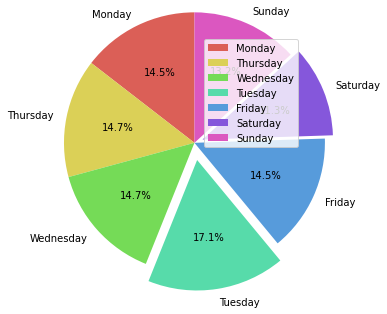

In [114]:
plt.pie(data[1], 
        labels = labs,
        colors = sns.color_palette("hls",7),
        startangle = 90,
        explode = (0,0,0,0.2,0,0.1,0),  # permite "sacar" partes de la torta
        radius = 1.5,
       autopct = "%1.1f%%",
       labeldistance = 1.1)
plt.legend(loc = "upper right")
plt.show()

In [66]:
np.random.seed(0)
df = pd.read_csv(inpath + "Flights_2008.csv", nrows = 100000)
df = df.sample(frac =1).head(100) #los primeros 100 elementos del nuevo orden
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3582,2008,1,4,5,1528.0,1525,1654.0,1630,WN,1061,...,10.0,21.0,0,NaN,0,0.0,0.0,24.0,0.0,0.0
60498,2008,1,21,1,658.0,700,815.0,825,WN,3774,...,4.0,5.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
53227,2008,1,19,6,2044.0,2020,2253.0,2245,WN,2903,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
21333,2008,1,9,3,627.0,630,723.0,740,WN,1683,...,4.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3885,2008,1,4,5,1642.0,1640,1746.0,1740,WN,141,...,4.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95350,2008,1,27,7,1134.0,1100,1428.0,1245,XE,200,...,91.0,9.0,0,NaN,0,3.0,0.0,69.0,0.0,31.0
54177,2008,1,19,6,1508.0,1510,1644.0,1655,WN,717,...,4.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
63741,2008,1,22,2,651.0,650,748.0,750,WN,989,...,3.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
62122,2008,1,22,2,727.0,730,939.0,940,WN,3580,...,5.0,25.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


Text(25.2, 120, 'Mi vuelo')

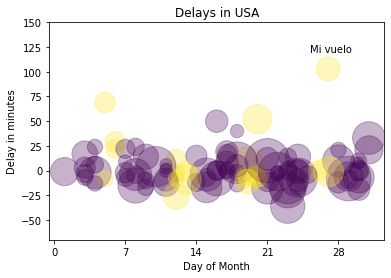

In [92]:
plt.scatter(x = df.DayofMonth, y = df.ArrDelay, s = df.Distance, alpha = .3, c = df.DayOfWeek.isin([6,7]))
plt.title("Delays in USA")
plt.ylabel("Delay in minutes")
plt.xlabel("Day of Month")
plt.ylim([-70,150])
plt.xticks([0, 7, 14, 21, 28]) #que numeros aparecen en x
plt.text(x = 25.2, y = 120, s ="Mi vuelo")

In [8]:
 ### Series temporales

df = pd.read_csv(inpath + "base_datos_2008.csv")
df = df[df["Origin"].isin(["HOU", "ATL", "IND"])]
df = df.head(500000)

In [20]:
times = []
for i in np.arange(len(df)):
    times.append(datetime.datetime(year = 2008, month = df.loc[i,"Month"], day = df.loc[i, "DayofMonth"]))

# La lista times contiene la fecha de cada observacion en formato date, posteriormente se agrega al df 

df["Time"] = times
times[2]

datetime.datetime(2008, 1, 3, 0, 0)

In [24]:
 # Posteriormente, agrupamos por fecha y obtenemos la media de los retrasos de salida y llegada   
data = df.groupby(by = ["Time"], as_index = False)["ArrDelay", "DepDelay"].mean()
data.head(10)

<ipython-input-24-2bf4b9fb6691>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = df.groupby(by = ["Time"], as_index = False)["ArrDelay", "DepDelay"].mean()


,Time,ArrDelay,DepDelay
0,2008-01-01,6.936508,13.074074
1,2008-01-02,8.159574,13.234043
2,2008-01-03,20.432153,25.289861
3,2008-01-04,14.235814,18.493897
4,2008-01-05,19.265662,23.172296
5,2008-01-06,14.718243,19.194052
6,2008-01-07,4.839978,9.154469
7,2008-01-08,1.065345,5.783920
8,2008-01-09,-2.373348,3.269252
9,2008-01-10,0.267697,5.421998


RangeIndex(start=0, stop=100000, step=1)

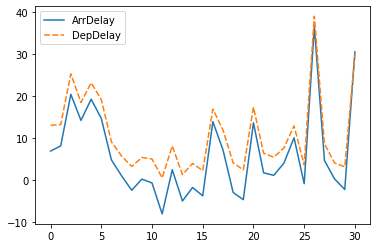

In [33]:
 # Ahora, las series de tiempo graficadas
sns.lineplot(data = data)


In [40]:
 ### Histogramas y Boxplots
    
df = pd.read_csv(inpath + "base_datos_2008.csv")
df.dropna(inplace = True, subset = ["ArrDelay", "DepDelay", "Distance"])

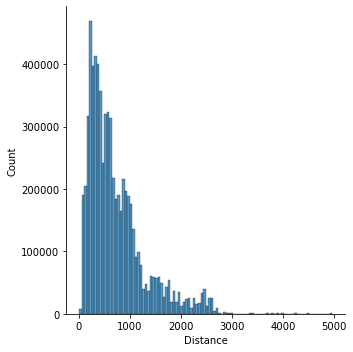

In [47]:
sns.displot(df["Distance"], bins = 100)

(-20.0, 150.0)

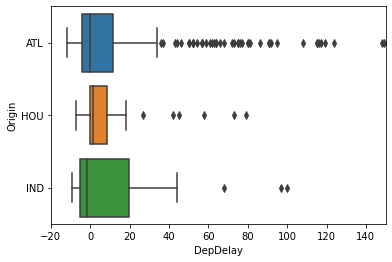

In [54]:
df2 = df[df["Origin"].isin(["HOU", "ATL", "IND"])].sample(frac = 1).head(500)
sns.boxplot(x = "DepDelay", y = "Origin", data = df2)
plt.xlim(-20,150)

In [55]:
 ### Nube de Puntos
    
df = pd.read_csv(inpath + "base_datos_2008.csv")
df.dropna(inplace = True, subset = ["ArrDelay", "DepDelay", "Distance", "AirTime"])

sns.set(rc = {"figure.figsize" : (15,10)})

C:\Users\Diego\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


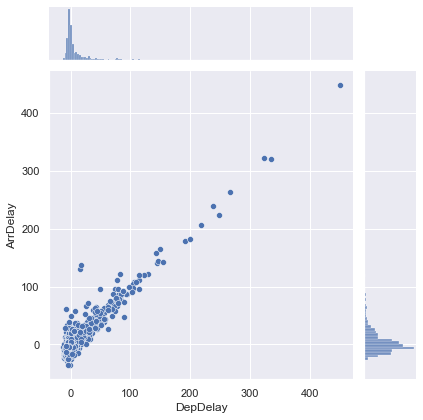

In [56]:
df2 = df[df["Origin"].isin(["HOU", "ATL", "IND"])].sample(frac = 1).head(1000)

sns.jointplot(df2["DepDelay"], df2["ArrDelay"]) # muestra un grafico de puntos mas histogramas que muestran distribucion

C:\Users\Diego\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


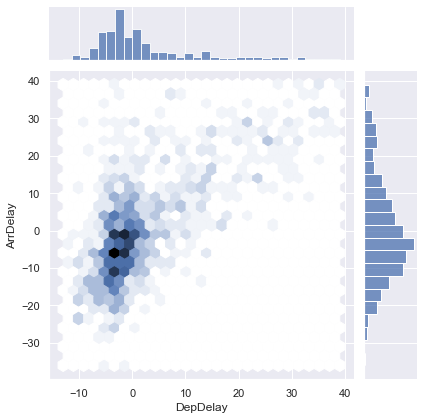

In [58]:
df3 = df2[np.abs(df2["DepDelay"]) < 40]
df3 = df3[np.abs(df3["ArrDelay"]) < 40]

sns.jointplot(df3["DepDelay"], df3["ArrDelay"], kind ="hex") # kind hex permite observar la densidad de puntos en diferentes puntos

C:\Users\Diego\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


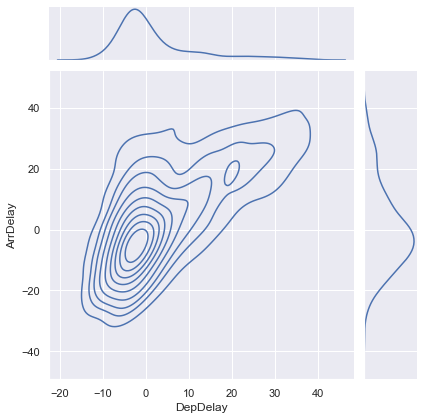

In [59]:
sns.jointplot(df3["DepDelay"], df3["ArrDelay"], kind ="kde") # kd con curvas de nivel

In [61]:
 ### Mapas de calor
    
gb_df = pd.DataFrame(df2.groupby(["Origin", "Month"], as_index = False)["DepDelay"].mean())
gb_df.head(10)

,Origin,Month,DepDelay
0,ATL,1,5.482759
1,ATL,2,19.666667
2,ATL,3,14.200000
3,ATL,4,14.479452
4,ATL,5,8.161765
5,ATL,6,12.406780
6,ATL,7,20.500000
7,ATL,8,11.333333
8,ATL,9,1.698630
9,ATL,10,12.064935


In [62]:
data = gb_df.pivot("Month", "Origin", "DepDelay") # reacomoda dataframes por categorias
data

Origin,ATL,HOU,IND
Month,,,
1,5.482759,21.916667,14.000000
2,19.666667,1.000000,17.666667
3,14.200000,12.333333,-1.750000
4,14.479452,2.307692,9.076923
5,8.161765,14.818182,0.142857
6,12.406780,85.166667,7.500000
7,20.500000,-2.111111,16.555556
8,11.333333,3.000000,9.833333
9,1.698630,7.000000,-1.400000
